# Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Dataset

In [19]:
Mall = pd.read_csv(r'C:\Users\Hp\Desktop\data science\Python\Datasets\Mall_Customers.csv') 
Mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
print(Mall.shape)

(200, 5)


# Missing value check

In [22]:
Mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Outlier check

<function matplotlib.pyplot.show(*args, **kw)>

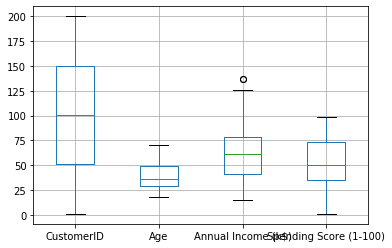

In [23]:
Mall.boxplot()
plt.show

We do not impute money related variable thus we will accept a single outlier point in Annual income

# Selecting X variable

We are selecting Annual income and Spending score as our X variable

Convertion X in array object as array object will process faster than dataframe object

In [24]:
X = Mall.values[ : , [3,4]]


# Finding value of K

We are using elbow method to find optimal number of clusters

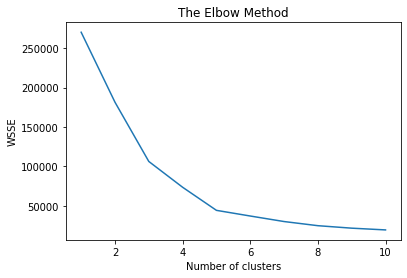

In [25]:
from sklearn.cluster import KMeans
wsse = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()



# Prediction

In [26]:
kmeans = KMeans(n_clusters = 5 , random_state = 10)
Y_pred = kmeans.fit_predict(X)
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

# Visualization

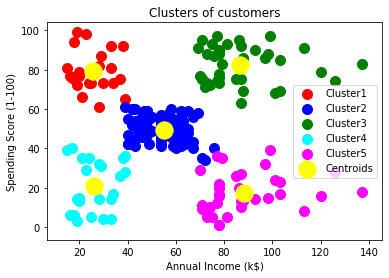

In [27]:
#X==>0th col(Annual Income)
#Y==>1st col(Spending Score)
#X[Y_pred == 0, 0]==>X[all obs which have been assigned to cluster 0,Annual income variable]
#X[Y_pred == 2, 1]==>X[all obs which have been assigned to cluster 2,Spending score variable]
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[Y_pred == 3, 0], X[Y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster4')
plt.scatter(X[Y_pred == 4, 0], X[Y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

 Giving meaningfull name to Clusters

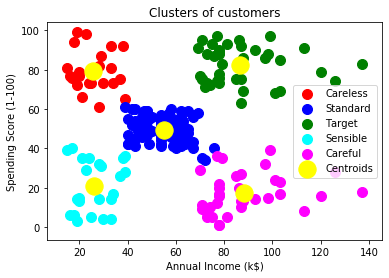

In [28]:
#X==>0th col(Annual Income)
#Y==>1st col(Spending Score)
#X[Y_pred == 0, 0]==>X[all obs which have been assigned to cluster 0,Annual income variable]
#X[Y_pred == 2, 1]==>X[all obs which have been assigned to cluster 2,Spending score variable]
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s = 100, c = 'red', label = 'Careless')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[Y_pred == 3, 0], X[Y_pred == 3, 1], s = 100, c = 'cyan', label = 'Sensible')
plt.scatter(X[Y_pred == 4, 0], X[Y_pred == 4, 1], s = 100, c = 'magenta', label = 'Careful')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [29]:
Mall['Cluster'] = Y_pred
Mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


Giving meaningfull name to Cluster column

In [30]:
Mall['Cluster'] = Mall.Cluster.map({0 : 'careless' , 1 : 'standard' , 2 :'target' , 3 : 'sensible' , 4 : 'careful'})
Mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,sensible
1,2,Male,21,15,81,careless
2,3,Female,20,16,6,sensible
3,4,Female,23,16,77,careless
4,5,Female,31,17,40,sensible


# Determining Targer customer 

In [31]:
Target = Mall[Mall['Cluster'] == 'target']
Target.shape

(39, 6)

 Converting list of targer customer to excel sheet for sharing it with client

In [32]:
Target.to_excel("TargerCustomer.xlsx")